In [3]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: C:\Users\Prajna Hebbar


In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [13]:
import pandas as pd

# Specify the file path
file_path = r'C:\Users\Prajna Hebbar\Office_Cristina.csv'  # Use raw string to avoid escape characters

# Read the CSV file and set 'timestamp' as the index column
df = pd.read_csv(file_path, index_col='timestamp')

# Display the DataFrame
print(df)

                     Office_Cristina
timestamp                           
2015-01-01 00:00:00            3.825
2015-01-01 01:00:00            3.375
2015-01-01 02:00:00            3.425
2015-01-01 03:00:00            3.525
2015-01-01 04:00:00            3.750
...                              ...
2015-12-31 19:00:00            3.250
2015-12-31 20:00:00            2.525
2015-12-31 21:00:00            3.050
2015-12-31 22:00:00            2.550
2015-12-31 23:00:00            3.175

[8760 rows x 1 columns]


In [15]:
train_data = df.iloc[:8040]
test_data = df.iloc[8040:]

In [17]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)


    return [X, y]

In [19]:
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [21]:
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [23]:
X_train = X1
y_train = y1
X_test = X2
y_test = y2

In [25]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [27]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (8016, 24)
y_train.shape =  (8016,)
X_test.shape =  (696, 24)
y_test.shape =  (696,)


In [29]:
model=RandomForestRegressor(n_estimators=100)

In [31]:
model.fit(X_train,y_train)

RandomForestRegressor()

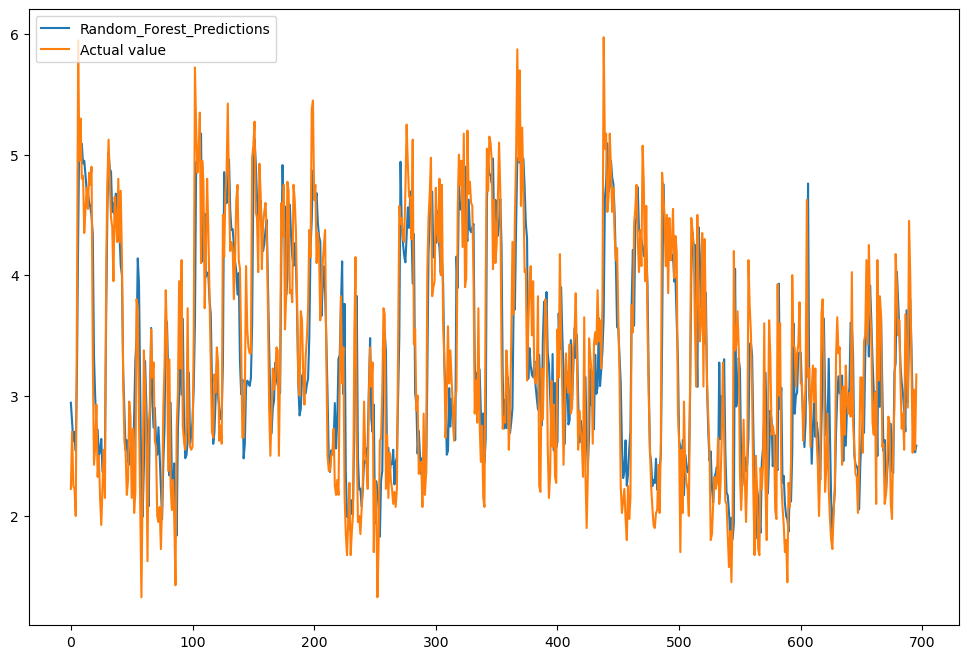

In [35]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [38]:
from sklearn.metrics import mean_absolute_percentage_error

In [40]:
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
mae_rf=mean_absolute_error(pred, y_test)
mape_test = mean_absolute_percentage_error(y_test, pred)

In [42]:
print('Mean Absolute Error for Random Forest Model is:',mae_rf)
print('Root Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Absolute Percentage Error for Random Forest Model is:',mape_test)

Mean Absolute Error for Random Forest Model is: 0.41975533045438945
Root Mean Squared Error for Random Forest Model is: 0.5418651647256395
Mean Absolute Percentage Error for Random Forest Model is: 0.13806943533073837
